(0.0, 1.0)

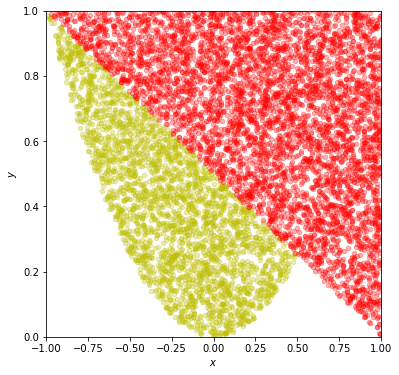

In [7]:
import numpy
import matplotlib.pyplot as plt

N = 10000
inside_A = []

inside_B = []


for i in range(N):
    x = numpy.random.uniform(-1, 1)
    y = numpy.random.uniform(0, 1)
    pos = (x,y)
    #if numpy.sqrt(x**2 + y**2) < 1:
    condition1 = y > x**2.
    condition2 = y < -0.5 * x + 0.5
    condition_3 = y > -0.5 * x + 0.5
    condition_4 = y < 1
    
    if condition1 == 1 and condition2 == 1:
        inside_A.append(pos)
    elif condition_3 == 1 and condition_4 == 1:
        inside_B.append(pos)

plt.figure(figsize=(6, 6))
plt.scatter([pos[0] for pos in inside_A], [pos[1] for pos in inside_A],
            color = 'y', marker='o', s = 20, alpha=0.3);


plt.scatter([pos[0] for pos in inside_B], [pos[1] for pos in inside_B],
            color = 'r', marker='o', s = 20, alpha=0.3);
#MC_pi = 4 * len(inside)/float(N)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.xlim([-1,1])
plt.ylim([0,1])
#plt.axis('equal')
#plt.savefig("Unit3.1_MC_Circle.png")  

